<a href="https://colab.research.google.com/github/PamePatzi/Quinoa-Quality-Inspection-NDA/blob/main/Quinoa_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



* Romel Antonio Baldivia Calderón de la Barca ---20%
* Daniel Franco Callisaya --- 20%
* Ariel Norman Clemente Quispe --- 20%
* Alexis Pamela Patzi Chavez --- 20%
* Cristian Bryan Santelices Roncal --- 20%

# **Quinoa Quality Inspection: NDA**

This code demonstrates the code of a convolutional neural network for classification, in this case for the quality inspection of quinoa grains. Inside this code you will find the explanation of each step taken for the generation of the model.

First, the libraries and dependencies needed to run the code are loaded. In addition, the Drive is mounted in order to access the dataset folders created on our own. It is important to mention that all the photos were taken with proffesional lens and approved by the professor.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
import os
import random
import numpy as np
import shutil

from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


because our data set is not divided into test, train and valid, the existing folders of the two classes 'Garbage' and 'Quinoa' are considered. The following code is only executed once and its purpose is to create the test, train and valid folders for optimal classification. For these divisions the parameters of train:0.6, test:0.2, valid:0.2 are used.

In [ ]:
# Ruta de la carpeta principal que contiene las carpetas de clases
ruta_principal = '/content/drive/MyDrive/Images NDA'

# Lista de clases (quinoa y basura en este caso)
clases = ['Quinoa', 'Basura']

# Porcentajes de datos que se usarán para entrenamiento, validación y prueba
porcentaje_entrenamiento = 0.6
porcentaje_validacion = 0.2
porcentaje_prueba = 0.2

# Iterar sobre las clases
for clase in clases:
    # Obtener la lista de imágenes para la clase actual
    ruta_clase = os.path.join(ruta_principal, clase)
    imagenes = os.listdir(ruta_clase)

    # Dividir las imágenes en conjuntos de entrenamiento, validación y prueba
    imagenes_temp, imagenes_prueba = train_test_split(imagenes, test_size=porcentaje_prueba, random_state=42)
    imagenes_entrenamiento, imagenes_validacion = train_test_split(imagenes_temp, test_size=porcentaje_validacion/(1-porcentaje_prueba), random_state=42)

    # Crear carpetas para entrenamiento, validación y prueba
    carpeta_entrenamiento = os.path.join(ruta_principal, 'train_v1', clase)
    carpeta_validacion = os.path.join(ruta_principal, 'valid_v1', clase)
    carpeta_prueba = os.path.join(ruta_principal, 'test_v1', clase)

    os.makedirs(carpeta_entrenamiento, exist_ok=True)
    os.makedirs(carpeta_validacion, exist_ok=True)
    os.makedirs(carpeta_prueba, exist_ok=True)

    # Mover imágenes a las carpetas correspondientes
    for imagen in imagenes_entrenamiento:
        origen = os.path.join(ruta_clase, imagen)
        destino = os.path.join(carpeta_entrenamiento, imagen)
        shutil.copy(origen, destino)
        print(f"Copiando {imagen} a {carpeta_entrenamiento}")

    for imagen in imagenes_validacion:
        origen = os.path.join(ruta_clase, imagen)
        destino = os.path.join(carpeta_validacion, imagen)
        shutil.copy(origen, destino)
        print(f"Copiando {imagen} a {carpeta_validacion}")

    for imagen in imagenes_prueba:
        origen = os.path.join(ruta_clase, imagen)
        destino = os.path.join(carpeta_prueba, imagen)
        shutil.copy(origen, destino)
        print(f"Copiando {imagen} a {carpeta_prueba}")

# Verificar algunas rutas y resultados
print("Ruta principal:", ruta_principal)
for clase in clases:
    ruta_clase = os.path.join(ruta_principal, clase)
    print(f"Cantidad de imágenes en {clase}: {len(os.listdir(ruta_clase))}")
    print(f"Cantidad de imágenes en train/{clase}: {len(os.listdir(os.path.join(ruta_principal, 'train_v1', clase)))}")
    print(f"Cantidad de imágenes en valid/{clase}: {len(os.listdir(os.path.join(ruta_principal, 'valid_v1', clase)))}")
    print(f"Cantidad de imágenes en test/{clase}: {len(os.listdir(os.path.join(ruta_principal, 'test_v1', clase)))}")
    print("----")

Copiando 20231118_124817.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando q67_3.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando 20231119_150238.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando 20231118_124512.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando q6_3.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando q97_5.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando 20231118_125035.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando 20231119_150350.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando 20231119_150310.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando q59_3.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando q37_5.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando q5_5.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando q79_2.jpg a /content/drive/MyDrive/Images NDA/train_v1/Quinoa
Copiando 20231118_1

Folders are copied to the main drive content.

In [ ]:
ruta_origen1 = '/content/drive/MyDrive/Images NDA/test_v1'
ruta_destino1 = '/content/test'
shutil.copytree(ruta_origen1, ruta_destino1)

'/content/test'

In [ ]:
ruta_origen2 = '/content/drive/MyDrive/Images NDA/train_v1'
ruta_destino2 = '/content/train'
ruta_origen3 = '/content/drive/MyDrive/Images NDA/valid_v1'
ruta_destino3 = '/content/valid'
shutil.copytree(ruta_origen2, ruta_destino2)
shutil.copytree(ruta_origen3, ruta_destino3)

'/content/valid'

In [ ]:
def preprocess_images(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to a square shape
    return image, label


The datasets are prepared.

In [ ]:
train_dir = '/content/train'
validation_dir = '/content/valid'
test_dir = '/content/test'
batch_size = 32
img_size = (224, 244)
NUM_CLASSES = len(os.listdir(train_dir))
train_dataset = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size= img_size,
  batch_size=batch_size)

Found 571 files belonging to 2 classes.
Using 457 files for training.


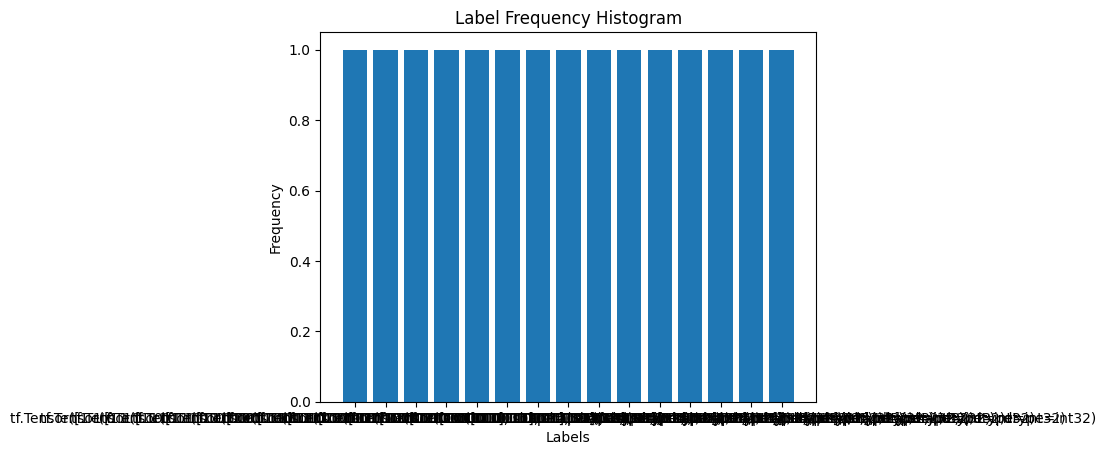

In [ ]:
# Visualize label frequency
label_counts = {}
for _, label in train_dataset:
    label_str = str(label)
    if label_str in label_counts:
        label_counts[label_str] += 1
    else:
        label_counts[label_str] = 1

labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Frequency Histogram')
plt.show()

In [ ]:
print(train_dataset.class_names)

['Basura', 'Quinoa']


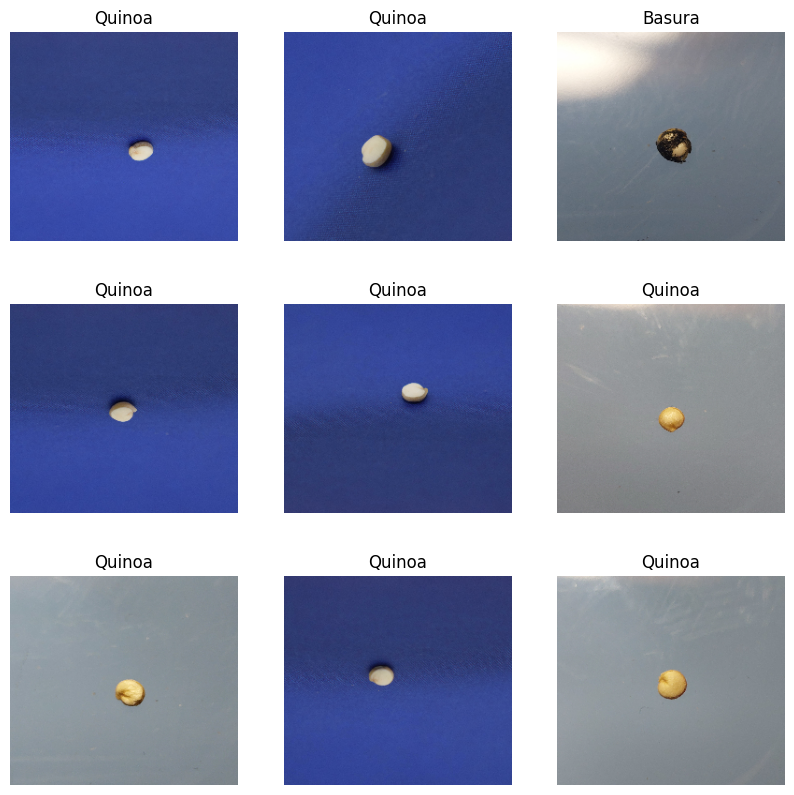

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
#datos test
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,shuffle=True,batch_size=batch_size,image_size=img_size)
#datos validación
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,shuffle=True,batch_size=batch_size,image_size=img_size)

Found 192 files belonging to 2 classes.
Found 192 files belonging to 2 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_dataset = train_dataset.map(preprocess_images)
validation_dataset = validation_dataset.map(preprocess_images)
test_dataset = test_dataset.map(preprocess_images)


Considering that the dataset was created by our authorship, a data augmentation is performed to comply with the parameters for the reaization of a convolutional model. In this case, nine variations are considered for each existing image in the dataset, increasing the amount of data considerably. It should be noted that this increase of images is included at the moment of training the model, that is to say, when the '.fit' part is reached.

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

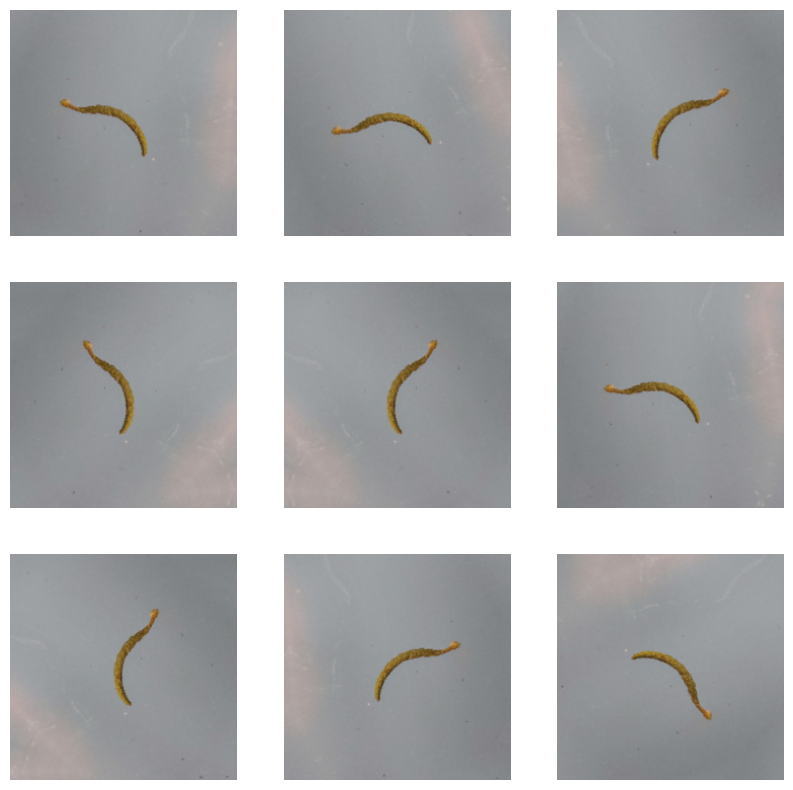

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
This way it can be visualize the variances of the images on the data augmentation.

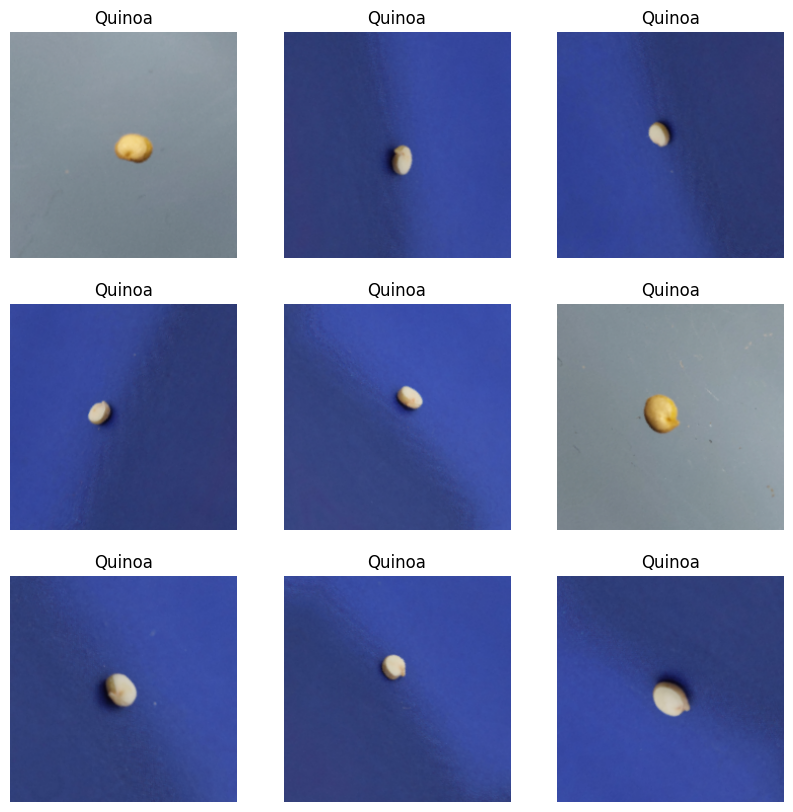

In [ ]:
# Visualize a few preprocessed images
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

The convolutional model is created, for which hidden layers of different values are considered, accepting images in the form (224,224,3) and using a type of activation function Relu, which is widely used in this type of models. Finally a normalization softmax is used. The model is compiled with a sparse_categorical_crossentropy loss type which, as previously investigated, is very useful for classification and multiclassing. On the other hand, an Adam optimizer is used, which is considered one of the fastest and most useful for the application, together with the specific accuracy metric, which will give us the main information about the performance of the model. For this part we use one of 10 epochs, which was enough to train the model well.

In [ ]:
# Creación del modelo CNN
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(100, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compilación del modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Augmentación de datos solo en el conjunto de entrenamiento
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

# Entrenamiento del modelo
model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

# Evaluación del modelo
loss, accuracy = model.evaluate(test_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
15/15 [==============================] - 37s 1s/step - loss: 41.9018 - accuracy: 0.6980 - val_loss: 0.3887 - val_accuracy: 0.7656
Epoch 2/10
15/15 [==============================] - 38s 2s/step - loss: 0.3094 - accuracy: 0.8293 - val_loss: 0.3787 - val_accuracy: 0.7812
Epoch 3/10
15/15 [==============================] - 36s 2s/step - loss: 0.2799 - accuracy: 0.8600 - val_loss: 0.2909 - val_accuracy: 0.8229
Epoch 4/10
15/15 [==============================] - 37s 2s/step - loss: 1.0515 - accuracy: 0.8578 - val_loss: 1.6831 - val_accuracy: 0.7604
Epoch 5/10
15/15 [==============================] - 35s 2s/step - loss: 0.5136 - accuracy: 0.8665 - val_loss: 0.1917 - val_accuracy: 0.9062
Epoch 6/10
15/15 [==============================] - 41s 2s/step - loss: 0.5296 - accuracy: 0.8381 - val_loss: 1.2892 - val_accuracy: 0.7969
Epoch 7/10
15/15 [==============================] - 46s 2s/step - loss: 0.4746 - accuracy: 0.8840 - val_loss: 1.8221 - val_accuracy: 0.8021
Epoch 8/10
15/15 [=

The model is saved in a .h5 format, with the idea of being able to use it externally as a trained model. In this case it is planned to use this model on a raspberry for the detection of quinoa on a conveyor belt.

In [ ]:
model.save('/content/model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


We proceed to perform tests with random images, making use of the previously generated model. This in order to see how it works with external data.

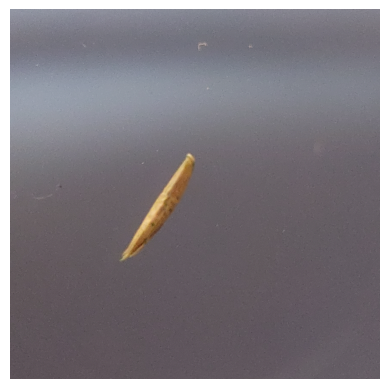

1/1 [==============================] - 0s 71ms/step
prediction: [[0.51069325 0.48930675]]
Probability for Class 'basura': 0.51069325
Probability for Class 'quinoa': 0.48930675
Basura


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.image as mpimg
# Carga del modelo entrenado
model = load_model('/content/model1.h5')

# Imagen de prueba
img_path = '/content/valid/Basura/20231026_140248.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
# Predicción
prediction = model.predict(img_array)
print("prediction:",prediction)
prob_class_0 = prediction[0][0]  # Probability for the first class
prob_class_1 = prediction[0][1]  # Probability for the second class

print("Probability for Class 'basura':", prob_class_0)
print("Probability for Class 'quinoa':", prob_class_1)
# Binary classification
if prediction[0][0] < 0.5:
    print("Quinoa")
else:
    print("Basura")



After performing different tests with the model, it was determined that it is working correctly. Showing the predictions for each class. Finally, we present the summary of the model.

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 100)       57700     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 26, 26, 100)      